In [1]:
import sys
from pathlib import Path
sys.path.append('/Users/schoens/Documents/Projekte/Econ/Code/v3/')

import xarray as xr
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import config.settings as cset

In [2]:
from matplotlib import rc, rcParams
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Calibri']})
#rc('font', **{'family': 'serif', 'serif': ['Times']})
rc('text', usetex  = False)

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

# GMT trajectory figure

In [3]:
scenarios = ['SP', 'Ref', 'Neg',  'GS', 'ssp534-over', 'CurPol']

list_gmt_ds = []
for i_scen in range(len(scenarios)):
    scenario = scenarios[i_scen]
    fair_ids_100  = pd.read_csv(cset.path_FAIR / f'ids_for_sarah.csv', sep = ',').rename(columns = {'Ref_1p5': 'Ref'})
    all_fair_runs = pd.read_csv(cset.path_FAIR  / f'scen_{scenario}.csv', index_col = 0).iloc[:, fair_ids_100.loc[:, scenario].values]
    all_fair_runs.columns = np.arange(100)
    import xarray as xr
    mesmer_ids = xr.load_dataset(cset.path_MESMER_fldmean / f'{scenario}_fldmean.nc')['fair_esm_variability_realisation'].values
    fair_ids_mesmer = [int(f.split('_')[0]) for f in mesmer_ids]
    gmt_trajectories = all_fair_runs.loc[:, fair_ids_mesmer]
    gmt_trajectories.columns = np.arange(100)
    list_gmt_ds.append(gmt_trajectories)

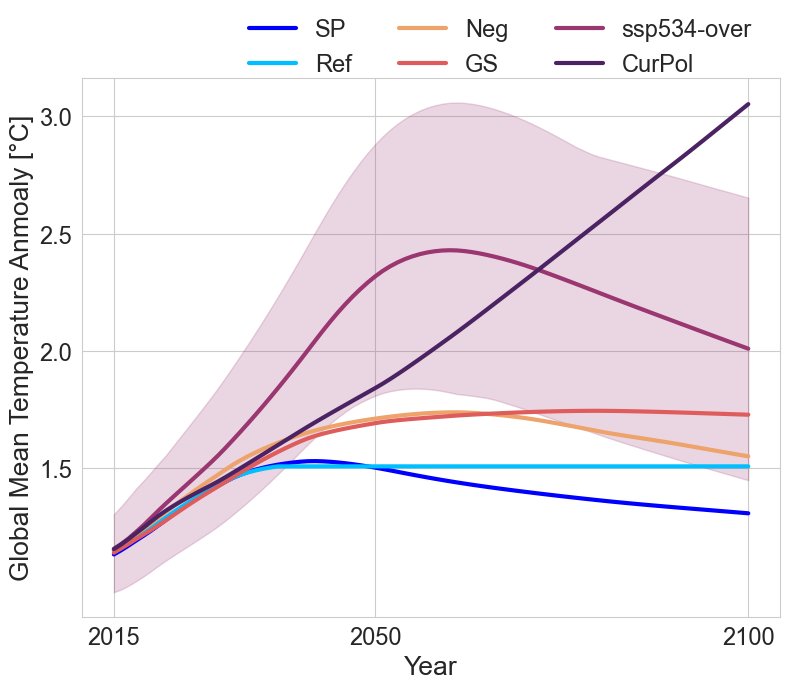

In [13]:
# plot gmt trajectories
cmap   = sns.color_palette("flare", as_cmap=True)
colors = cmap(np.linspace(0,1,len(scenarios)))
colors = ['blue', '#00BFFF'] + list(cmap(np.linspace(0,1,len(scenarios)-2)))
colors[2] = np.array([0.92907237, 0.64073303, 0.41912363, 1.0])
# colors = colors = sns.color_palette("rocket_r", 6)  # Reverse rocket to go blue to red-purple
# colors = sns.light_palette("blue", as_cmap=False, input="xkcd", n_colors=3) + sns.light_palette("purple", as_cmap=False, input="xkcd", n_colors=3)
# sns.palplot(colors)
# colors = ['#00BFFF', '#FFA500', '#ff571a', '#b3006e', '#692F6A']
# colors = ['#00BFFF', '#FFA500', '#ff571a', '#b3006e', '#692F6A']
# colors = ['#00BFFF', '#001f99', '#FFA500', '#ff571a', '#e60000', '#b3006e', '#692F6A']
# colors = ['#00BFFF', '#001f99', '#FFA500', '#ff571a', '#e60000', '#cb015c', '#692F6A']

labelsize_large = 19
labelsize_medium = 17
labelsize_small  = 17
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (8,7))
    i_scen = 4
    q_05, q_95 = np.quantile(list_gmt_ds[i_scen].loc[slice(2015,2100), :].values, q = [0.05,0.95], axis = 1)
    ax.fill_between(np.linspace(2015,2100,86), q_05, q_95, color = colors[i_scen], alpha = 0.2)
    x_eoc = np.zeros((len(scenarios), 3))
    for i_scen in range(len(scenarios)):
        scenario = scenarios[i_scen]
        gmt_trajectories = list_gmt_ds[i_scen].loc[slice(2015,2100), :].mean(axis = 1)
        ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = colors[i_scen], linewidth = 3, label = scenario)
        qs = np.quantile(list_gmt_ds[i_scen].loc[2100, :], q = [0.17,0.5,0.83])
        x_eoc[i_scen, :] = qs
        x_eoc[i_scen, 1] = gmt_trajectories.values[-1]
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = labelsize_small)
    ax.set_yticks([1.5,2.0,2.5,3.0])
    ax.set_yticklabels([1.5,2.0,2.5,3.0], fontsize = labelsize_small)
    ax.set_xlabel('Year', fontsize = labelsize_large)
    ax.set_ylabel('Global Mean Temperature Anmoaly [°C]', fontsize = labelsize_large)
    ax.legend(ncol = 3, fontsize = labelsize_medium, loc = 'upper right', frameon = False, bbox_to_anchor=(0.99, 1.15))
    plt.tight_layout()
    plt.show()

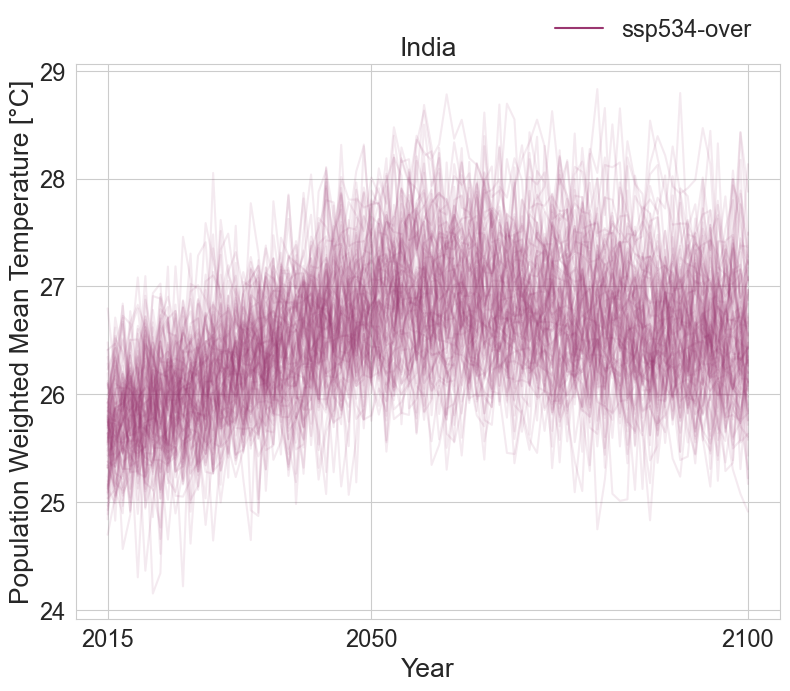

In [35]:
tas_xr = xr.load_dataset(cset.path_GDP / f'processed/temperature_data.nc')
tas_tmp  = tas_xr['tas'].sel(scen = 'ssp534-over', iso  = 'IND').values.T 
# - tas_xr['tas'].sel(scen = 'GS', iso  = 'CHN').values[:, 0]

color = colors[4]
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (8,7))
    ax.plot(gmt_trajectories.index, tas_tmp[:,:], color = color, alpha = .1)
    ax.plot(2015, 25.5, color = color, label = 'ssp534-over')
    # gmt_trajectories = list_gmt_ds[2].loc[slice(2015,2100), :].mean(axis = 1)
    # ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = color, linewidth = 2.5, label = scenario)
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = labelsize_small)
    ax.set_yticks([24,25,26,27,28,29])
    ax.set_yticklabels([24,25,26,27,28,29], fontsize = labelsize_small)
    # ax.set_yticks([1.5,2.0,2.5,3.0])
    # ax.set_yticklabels([1.5,2.0,2.5,3.0], fontsize = 13)
    ax.set_xlabel('Year', fontsize = labelsize_large)
    ax.set_ylabel('Population Weighted Mean Temperature [°C]', fontsize = labelsize_large)
    ax.legend(ncol = 5, fontsize = labelsize_medium, loc = 'upper right', frameon = False, bbox_to_anchor=(0.99, 1.12))
    plt.title('India', fontsize = labelsize_large)
    plt.tight_layout()
    plt.show()

In [37]:
import joblib
gdp_array    = joblib.load(f'/Users/schoens/Documents/Projekte/Econ/Results/202401_results_v2/Clustering_Results/ssp534-over_gdp_data.pkl')

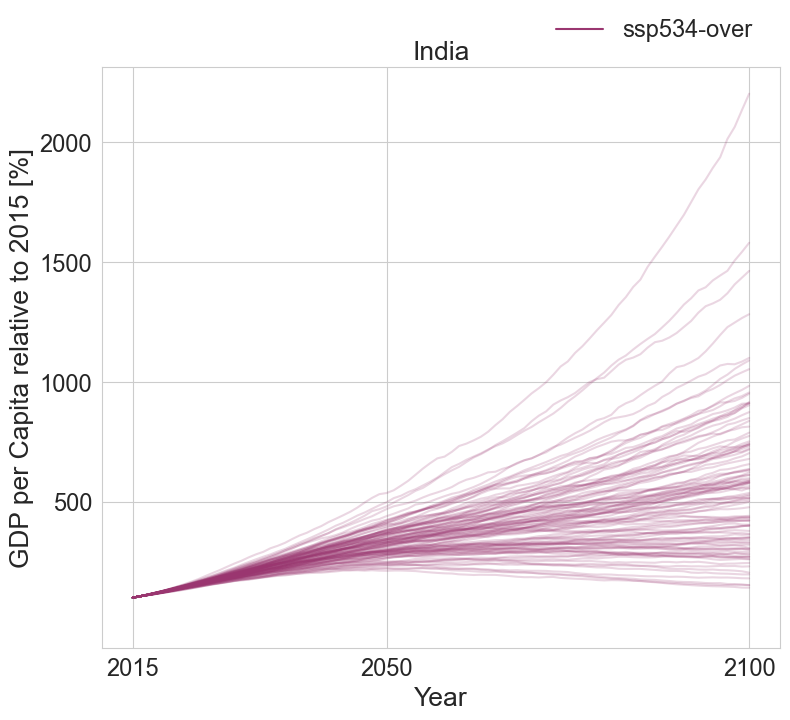

In [40]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (8,7))
    # plt.plot(np.arange(2015,2101,1), gdp_array[:, 2700:2800], color = 'indigo', alpha = .3)
    # plt.plot(np.arange(2015,2101,1), gdp_array[:, 6700:6800], color = 'purple', alpha = .3)
    # plt.plot(np.arange(2015,2101,1), gdp_array[:, 1900:2000], color = 'deepskyblue', alpha = .3)
    ax.plot(np.arange(2015,2101,1), gdp_array[:, 6500:6600]/gdp_array[0, 6500:6600]*100, color = (0.60407977, 0.21017746, 0.43913439, 1.), alpha = .2)
    ax.plot(2015, 1, color = color, label = 'ssp534-over')
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = labelsize_small)
    ax.set_yticks([500,1000,1500,2000])
    ax.set_yticklabels([500,1000,1500,2000], fontsize = labelsize_small)
    ax.set_xlabel('Year', fontsize = labelsize_large)
    ax.set_ylabel('GDP per Capita relative to 2015 [%]', fontsize = labelsize_large)
    plt.title('India' ,fontsize = labelsize_large)
    plt.tight_layout()
    ax.legend(ncol = 1, fontsize = labelsize_medium, loc = 'upper right', frameon = False, bbox_to_anchor=(0.99, 1.12))
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


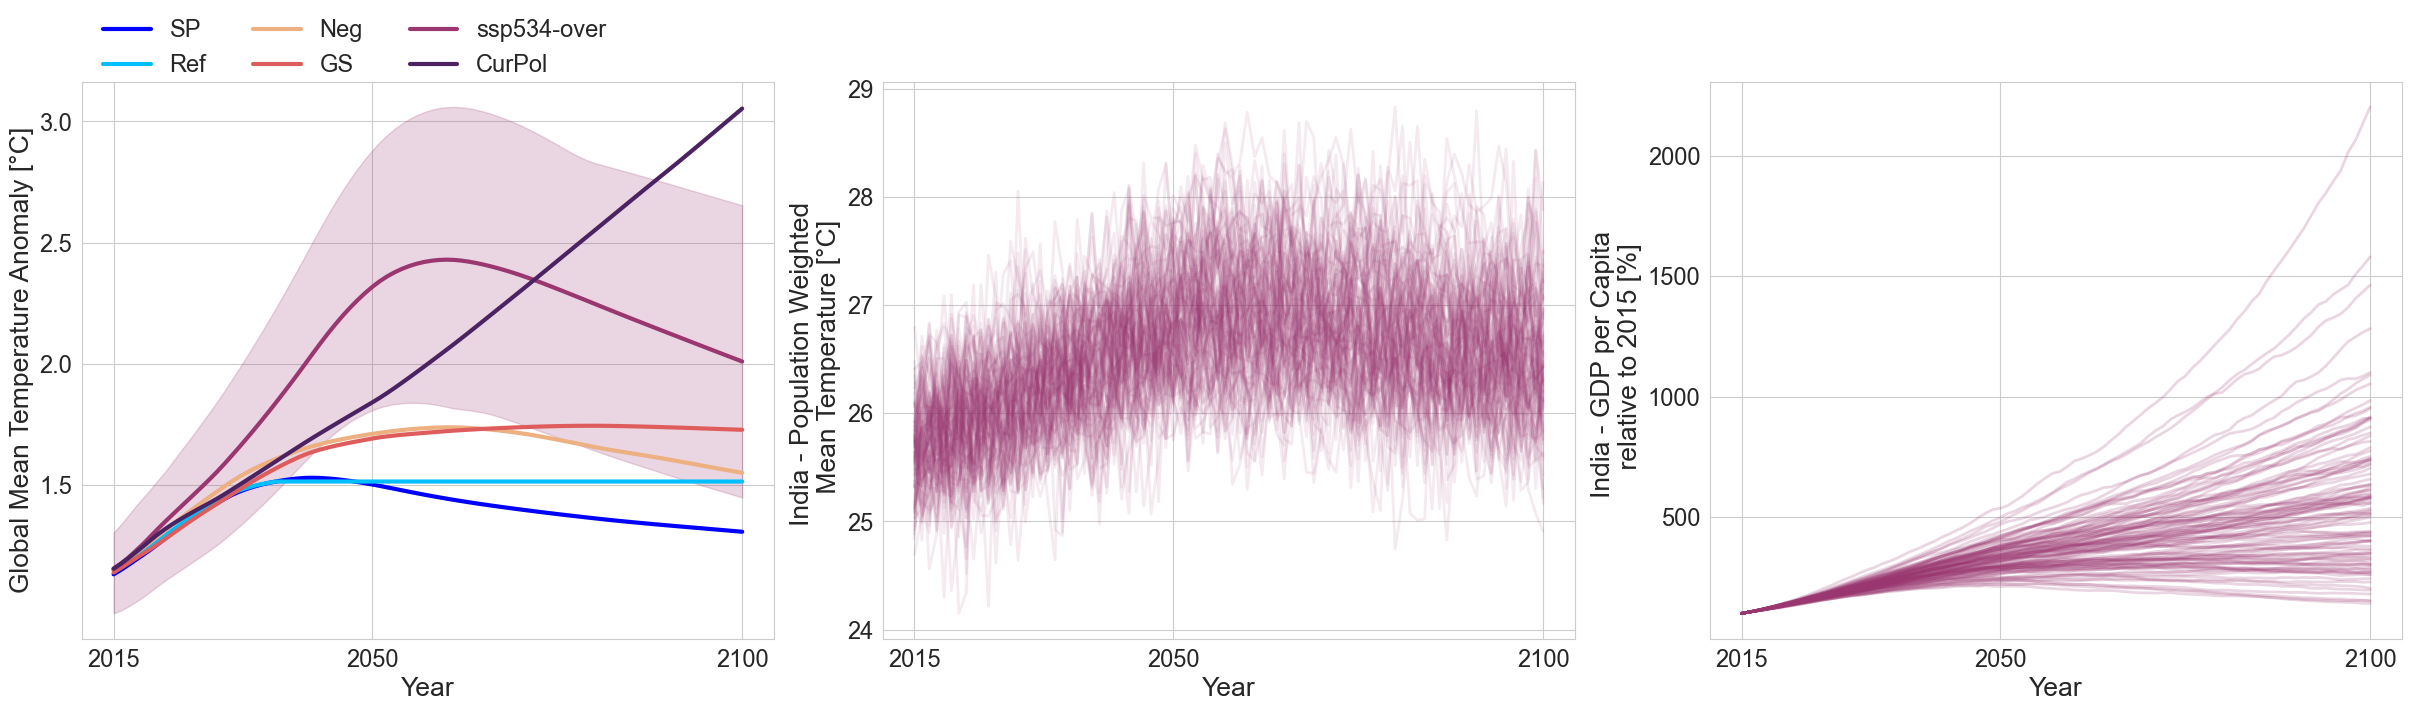

In [63]:

labelsize_large = 19
labelsize_medium = 17
labelsize_small = 17

with sns.axes_style('whitegrid'):
    fig, axes = plt.subplots(1, 3, figsize=(24, 7), constrained_layout=True)

    # First subplot: GMT trajectories
    ax = axes[0]
    i_scen = 4
    q_05, q_95 = np.quantile(list_gmt_ds[i_scen].loc[slice(2015, 2100), :].values, q=[0.05, 0.95], axis=1)
    ax.fill_between(np.linspace(2015, 2100, 86), q_05, q_95, color=colors[i_scen], alpha=0.2)
    x_eoc = np.zeros((len(scenarios), 3))
    for i_scen in range(len(scenarios)):
        scenario = scenarios[i_scen]
        gmt_trajectories = list_gmt_ds[i_scen].loc[slice(2015, 2100), :].mean(axis=1)
        ax.plot(gmt_trajectories.index, gmt_trajectories.values, color=colors[i_scen], linewidth=3, label=scenario)
        qs = np.quantile(list_gmt_ds[i_scen].loc[2100, :], q=[0.17, 0.5, 0.83])
        x_eoc[i_scen, :] = qs
        x_eoc[i_scen, 1] = gmt_trajectories.values[-1]
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize=labelsize_small)
    ax.set_yticks([1.5, 2.0, 2.5, 3.0])
    ax.set_yticklabels([1.5, 2.0, 2.5, 3.0], fontsize=labelsize_small)
    ax.set_xlabel('Year', fontsize=labelsize_large)
    ax.set_ylabel('Global Mean Temperature Anomaly [°C]', fontsize=labelsize_large)
    ax.legend(ncol=3, fontsize=labelsize_medium, loc='upper left', frameon=False, bbox_to_anchor=(0, 1.15))

    # Second subplot: Population weighted mean temperature
    ax = axes[1]
    tas_tmp = tas_xr['tas'].sel(scen='ssp534-over', iso='IND').values.T
    color = colors[4]
    ax.plot(gmt_trajectories.index, tas_tmp[:, :], color=color, alpha=.1, linewidth  = 2)
    # ax.plot(2015, 25.5, color=color, linewidth = 3, label='ssp534-over')
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize=labelsize_small)
    ax.set_yticks([24, 25, 26, 27, 28, 29])
    ax.set_yticklabels([24, 25, 26, 27, 28, 29], fontsize=labelsize_small)
    ax.set_xlabel('Year', fontsize=labelsize_large)
    ax.set_ylabel('India - Population Weighted \n Mean Temperature [°C]', fontsize=labelsize_large)
    ax.legend(ncol=5, fontsize=labelsize_medium, loc='upper right', frameon=False, bbox_to_anchor=(0.99, 1.12))
    # ax.set_title('India', fontsize=labelsize_large)

    # Third subplot: GDP per capita relative to 2015
    ax = axes[2]
    ax.plot(np.arange(2015, 2101, 1), gdp_array[:, 6500:6600] / gdp_array[0, 6500:6600] * 100, color=(0.60407977, 0.21017746, 0.43913439, 1.), alpha=.2, linewidth  = 2)
    # for i_scen in range(len(scenarios)):
    #     scenario = scenarios[i_scen]
    #     color = colors[i_scen]
    #     ax.plot(2015, 1, color=color, linewidth = 3, label=scenario)
    # ax.plot(2015, 1, color=color, linewidth = 3, label='ssp534-over')
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize=labelsize_small)
    ax.set_yticks([500, 1000, 1500, 2000])
    ax.set_yticklabels([500, 1000, 1500, 2000], fontsize=labelsize_small)
    ax.set_xlabel('Year', fontsize=labelsize_large)
    ax.set_ylabel('India - GDP per Capita \n relative to 2015 [%]', fontsize=labelsize_large)
    # ax.set_title('India', fontsize=labelsize_large)
    ax.legend(ncol=3, fontsize=labelsize_medium, loc='upper right', frameon=False, bbox_to_anchor=(0.99, 1.15))

    plt.show()

In [20]:
# maximum and eoc temperatures
ntwr           = []
tas_eoc        = []
tas_max        = []
tas_exceedence = []

for i_scen in range(len(scenarios)):
    scenario         = scenarios[i_scen]
    ntwr.append(list_gmt_ds[i_scen].rolling(window = 25, axis = 0, center = True).mean().loc[slice(2020,2040), :].diff().mean().values)
    tas_eoc.append(list_gmt_ds[i_scen].loc[2100, :].values)
    tas_max.append(list_gmt_ds[i_scen].loc[slice(2015,2100), :].max(axis = 0))
    tas_tmp            = list_gmt_ds[i_scen].values-1.5
    tas_tmp[tas_tmp<0] = 0
    tas_exceedence.append(tas_tmp[-86:, :].sum(axis = 0))

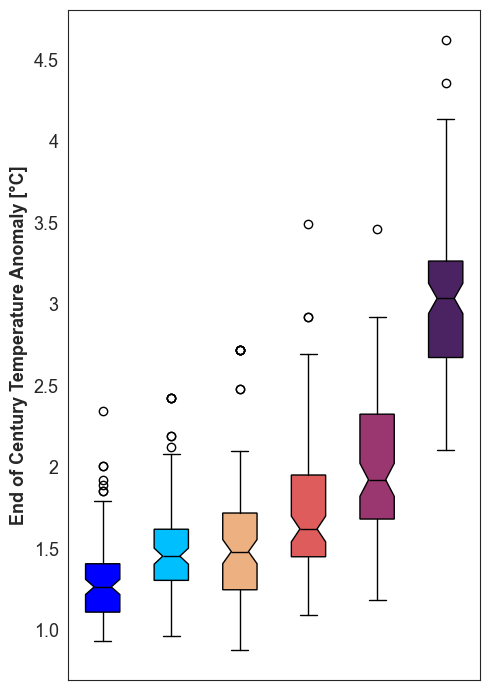

In [24]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize = (5,7))
    bplot1 = ax.boxplot(tas_eoc, labels = scenarios, patch_artist = True, notch=True)
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bplot1[element], color='black')

    ax.set_xticklabels([], rotation=30, fontsize=13)
    ax.set_yticks([1.0,1.5,2,2.5,3,3.5,4,4.5])
    ax.set_yticklabels([1.0,1.5,2,2.5,3,3.5,4,4.5],fontsize=13)
    ax.set_ylabel('End of Century Temperature Anomaly [°C]', fontsize = 13, fontweight = 'bold')
    plt.tight_layout()
    plt.show()

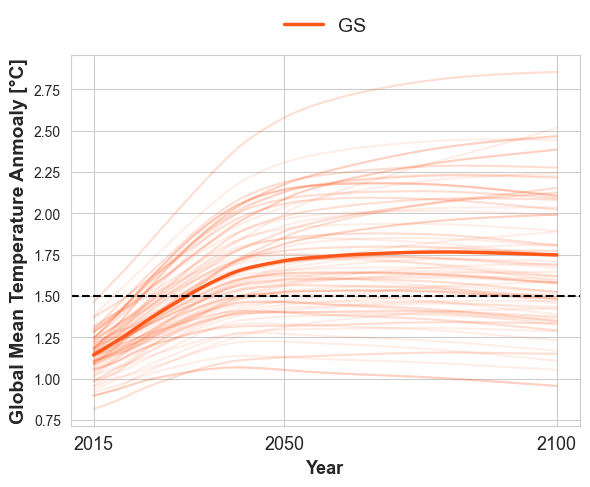

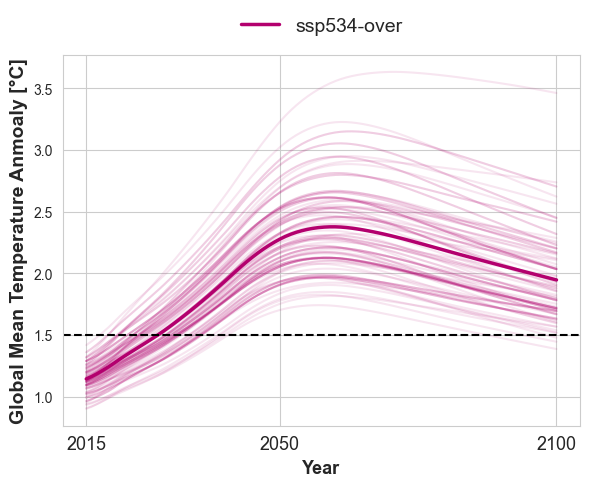

In [34]:
scenario = 'GS'
color    = '#ff571a'

fair_ids_100          = pd.read_csv(f'/Users/schoens/Documents/Projekte/Econ/Data_FaIR/ids_for_peter.csv', sep = ',')
all_fair_runs         = pd.read_csv(f'/Users/schoens/Documents/Projekte/Econ/Data_FaIR/scen_{scenario}.csv', index_col = 0).iloc[:, fair_ids_100.loc[:, scenario].values].loc[slice(2015,2100),:]
all_fair_runs.columns = np.arange(100)
mesmer_ids            = xr.load_dataset(f'/Users/schoens/Documents/Projekte/Econ/Data_MESMER/{scenario}_fldmean.nc')['fair_esm_variability_realisation'].values
fair_ids_mesmer       = [int(f.split('_')[0]) for f in mesmer_ids]
gmt_realisations      = all_fair_runs.loc[:, fair_ids_mesmer].values[-86:,:]

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (6,5))
    ax.plot(gmt_trajectories.index, gmt_realisations, color = color, alpha = .1)
    gmt_trajectories = list_gmt_ds[2].loc[slice(2015,2100), :].mean(axis = 1)
    ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = color, linewidth = 2.5, label = scenario)
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = 13)
    # ax.set_yticks([1.5,2.0,2.5,3.0])
    # ax.set_yticklabels([1.5,2.0,2.5,3.0], fontsize = 13)
    ax.set_xlabel('Year', fontsize = 13, fontweight = 'bold')
    ax.set_ylabel('Global Mean Temperature Anmoaly [°C]', fontsize = 14, fontweight = 'bold')
    ax.axhline(1.5, color = 'black', linestyle = '--')
    ax.legend(ncol = 5, fontsize = 14, loc = 'upper center', frameon = False, bbox_to_anchor=(0.5, 1.15))
    plt.tight_layout()
    plt.show()
    
scenario = 'ssp534-over'
color    = '#b3006e'

fair_ids_100          = pd.read_csv(f'/Users/schoens/Documents/Projekte/Econ/Data_FaIR/ids_for_peter.csv', sep = ',')
all_fair_runs         = pd.read_csv(f'/Users/schoens/Documents/Projekte/Econ/Data_FaIR/scen_{scenario}.csv', index_col = 0).iloc[:, fair_ids_100.loc[:, scenario].values].loc[slice(2015,2100),:]
all_fair_runs.columns = np.arange(100)
mesmer_ids            = xr.load_dataset(f'/Users/schoens/Documents/Projekte/Econ/Data_MESMER/{scenario}_fldmean.nc')['fair_esm_variability_realisation'].values
fair_ids_mesmer       = [int(f.split('_')[0]) for f in mesmer_ids]
gmt_realisations      = all_fair_runs.loc[:, fair_ids_mesmer].values[-86:,:]

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (6,5))
    ax.plot(gmt_trajectories.index, gmt_realisations, color = color, alpha = .1)
    gmt_trajectories = list_gmt_ds[3].loc[slice(2015,2100), :].mean(axis = 1)
    ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = color, linewidth = 2.5, label = scenario)
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = 13)
    # ax.set_yticks([1.5,2.0,2.5,3.0])
    # ax.set_yticklabels([1.5,2.0,2.5,3.0], fontsize = 13)
    ax.set_xlabel('Year', fontsize = 13, fontweight = 'bold')
    ax.set_ylabel('Global Mean Temperature Anmoaly [°C]', fontsize = 14, fontweight = 'bold')
    ax.legend(ncol = 5, fontsize = 14, loc = 'upper center', frameon = False, bbox_to_anchor=(0.5, 1.15))
    ax.axhline(1.5, color = 'black', linestyle = '--')
    plt.tight_layout()
    plt.show()

In [36]:
scenario = 'GS'
color    = '#ff571a'

gmt_realisations      = xr.load_dataset(f'/Users/schoens/Documents/Projekte/Econ/Data_MESMER/{scenario}_fldmean.nc')['tas'].values



In [41]:
np.shape(gmt_realisations['tas'].values)

(100, 251)

In [ ]:



fair_ids_100          = pd.read_csv(cset.path_FAIR / f'ids_for_peter.csv', sep = ',')
all_fair_runs         = pd.read_csv(cset.path_FAIR / f'scen_{scenario}.csv', index_col = 0).iloc[:, fair_ids_100.loc[:, scenario].values].loc[slice(2015,2100),:]
all_fair_runs.columns = np.arange(100)

fair_ids_mesmer       = [int(f.split('_')[0]) for f in mesmer_ids]
gmt_realisations      = all_fair_runs.loc[:, fair_ids_mesmer].values[-86:,:]

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (6,5))
    ax.plot(gmt_trajectories.index, gmt_realisations, color = color, alpha = .1)
    gmt_trajectories = list_gmt_ds[2].loc[slice(2015,2100), :].mean(axis = 1)
    ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = color, linewidth = 2.5, label = scenario)
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = 13)
    # ax.set_yticks([1.5,2.0,2.5,3.0])
    # ax.set_yticklabels([1.5,2.0,2.5,3.0], fontsize = 13)
    ax.set_xlabel('Year', fontsize = 13, fontweight = 'bold')
    ax.set_ylabel('Global Mean Temperature Anmoaly [°C]', fontsize = 14, fontweight = 'bold')
    ax.axhline(1.5, color = 'black', linestyle = '--')
    ax.legend(ncol = 5, fontsize = 14, loc = 'upper center', frameon = False, bbox_to_anchor=(0.5, 1.15))
    plt.tight_layout()
    plt.show()
    
scenario = 'ssp534-over'
color    = '#b3006e'

fair_ids_100          = pd.read_csv(f'/Users/schoens/Documents/Projekte/Econ/Data_FaIR/ids_for_peter.csv', sep = ',')
all_fair_runs         = pd.read_csv(f'/Users/schoens/Documents/Projekte/Econ/Data_FaIR/scen_{scenario}.csv', index_col = 0).iloc[:, fair_ids_100.loc[:, scenario].values].loc[slice(2015,2100),:]
all_fair_runs.columns = np.arange(100)
mesmer_ids            = xr.load_dataset(f'/Users/schoens/Documents/Projekte/Econ/Data_MESMER/{scenario}_fldmean.nc')['fair_esm_variability_realisation'].values
fair_ids_mesmer       = [int(f.split('_')[0]) for f in mesmer_ids]
gmt_realisations      = all_fair_runs.loc[:, fair_ids_mesmer].values[-86:,:]

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (6,5))
    ax.plot(gmt_trajectories.index, gmt_realisations, color = color, alpha = .1)
    gmt_trajectories = list_gmt_ds[3].loc[slice(2015,2100), :].mean(axis = 1)
    ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = color, linewidth = 2.5, label = scenario)
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = 13)
    # ax.set_yticks([1.5,2.0,2.5,3.0])
    # ax.set_yticklabels([1.5,2.0,2.5,3.0], fontsize = 13)
    ax.set_xlabel('Year', fontsize = 13, fontweight = 'bold')
    ax.set_ylabel('Global Mean Temperature Anmoaly [°C]', fontsize = 14, fontweight = 'bold')
    ax.legend(ncol = 5, fontsize = 14, loc = 'upper center', frameon = False, bbox_to_anchor=(0.5, 1.15))
    ax.axhline(1.5, color = 'black', linestyle = '--')
    plt.tight_layout()
    plt.show()

In [36]:
tas_xr = xr.load_dataset(cset.path_GDP / f'processed/temperature_data.nc')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


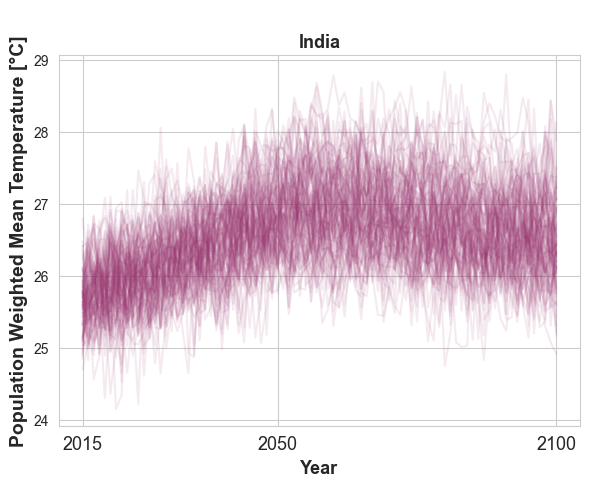

In [39]:
tas_tmp  = tas_xr['tas'].sel(scen = 'ssp534-over', iso  = 'IND').values.T 
# - tas_xr['tas'].sel(scen = 'GS', iso  = 'CHN').values[:, 0]

color = colors[4]
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (8,7))
    ax.plot(gmt_trajectories.index, tas_tmp[:,:], color = color, alpha = .1)
    # gmt_trajectories = list_gmt_ds[2].loc[slice(2015,2100), :].mean(axis = 1)
    # ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = color, linewidth = 2.5, label = scenario)
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = 13)
    # ax.set_yticks([1.5,2.0,2.5,3.0])
    # ax.set_yticklabels([1.5,2.0,2.5,3.0], fontsize = 13)
    ax.set_xlabel('Year', fontsize = 13, fontweight = 'bold')
    ax.set_ylabel('Population Weighted Mean Temperature [°C]', fontsize = 14, fontweight = 'bold')
    ax.legend(ncol = 5, fontsize = 14, loc = 'upper center', frameon = False, bbox_to_anchor=(0.5, 1.15))
    plt.title('India', fontsize = 13, fontweight = 'bold')
    plt.tight_layout()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


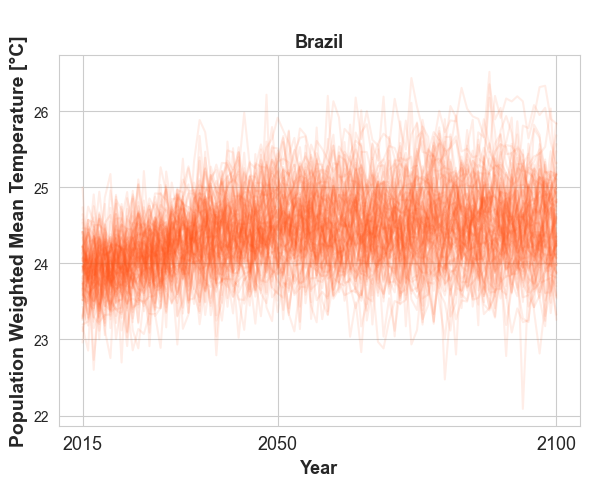

In [7]:
tas_tmp  = tas_xr['tas'].sel(scen = 'ssp534-over', iso  = 'IND').values.T 
# - tas_xr['tas'].sel(scen = 'GS', iso  = 'CHN').values[:, 0]

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (6,5))
    ax.plot(gmt_trajectories.index, tas_tmp, color = color, alpha = .1)
    # gmt_trajectories = list_gmt_ds[2].loc[slice(2015,2100), :].mean(axis = 1)
    # ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = color, linewidth = 2.5, label = scenario)
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = 13)
    # ax.set_yticks([1.5,2.0,2.5,3.0])
    # ax.set_yticklabels([1.5,2.0,2.5,3.0], fontsize = 13)
    ax.set_xlabel('Year', fontsize = 13, fontweight = 'bold')
    ax.set_ylabel('Population Weighted Mean Temperature [°C]', fontsize = 14, fontweight = 'bold')
    ax.legend(ncol = 5, fontsize = 14, loc = 'upper center', frameon = False, bbox_to_anchor=(0.5, 1.15))
    plt.title('Brazil', fontsize = 13, fontweight = 'bold')
    plt.tight_layout()
    plt.show()

In [24]:
np.shape(tas_tmp)

(251, 100)

In [28]:
# maximum and eoc temperatures
ntwr           = []
tas_eoc        = []
tas_max        = []
tas_exceedence = []

for i_scen in range(len(scenarios)):
    scenario         = scenarios[i_scen]
    ntwr.append(list_gmt_ds[i_scen].rolling(window = 25, axis = 0, center = True).mean().loc[slice(2020,2040), :].diff().mean().values)
    tas_eoc.append(list_gmt_ds[i_scen].loc[2100, :].values)
    tas_max.append(list_gmt_ds[i_scen].loc[slice(2015,2100), :].max(axis = 0))
    tas_tmp            = list_gmt_ds[i_scen].values-1.5
    tas_tmp[tas_tmp<0] = 0
    tas_exceedence.append(tas_tmp[-86:, :].sum(axis = 0))

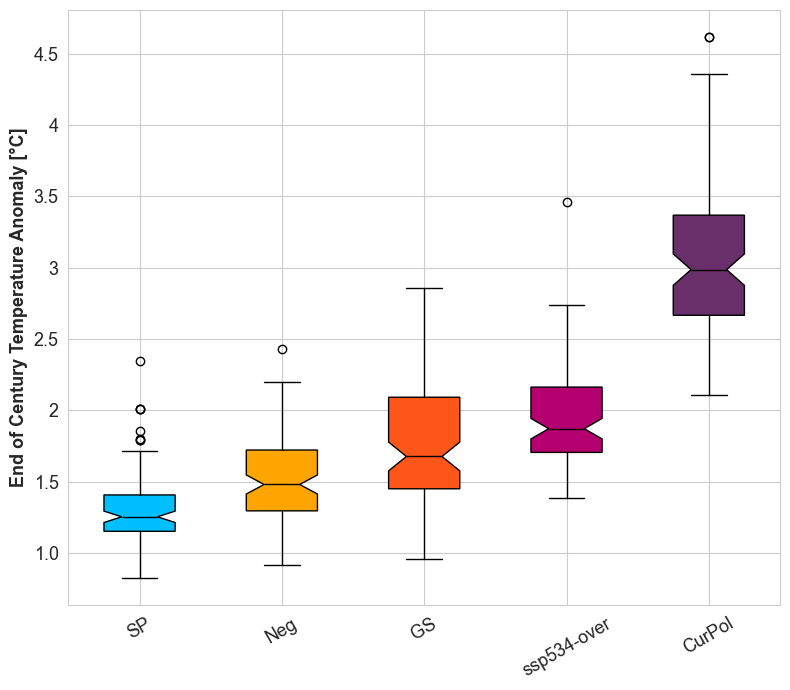

In [26]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (8,7))
    bplot1 = ax.boxplot(tas_eoc, labels = scenarios, patch_artist = True, notch=True)
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bplot1[element], color='black')

    ax.set_xticklabels(scenarios, rotation=30, fontsize=13)
    ax.set_yticks([1.0,1.5,2,2.5,3,3.5,4,4.5])
    ax.set_yticklabels([1.0,1.5,2,2.5,3,3.5,4,4.5],fontsize=13)
    ax.set_ylabel('End of Century Temperature Anomaly [°C]', fontsize = 13, fontweight = 'bold')
    plt.tight_layout()
    plt.show()

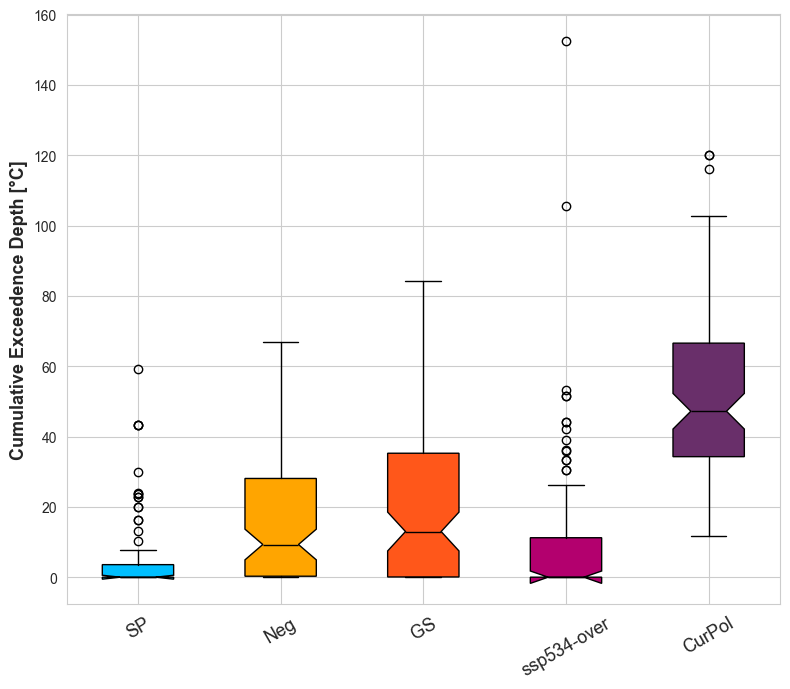

In [35]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (8,7))
    bplot1 = ax.boxplot(tas_exceedence, labels = scenarios, patch_artist = True, notch=True)
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bplot1[element], color='black')

    ax.set_xticklabels(scenarios, rotation=30, fontsize=13)
    # ax.set_yticks([1.0,1.5,2,2.5,3,3.5,4,4.5])
    # ax.set_yticklabels([1.0,1.5,2,2.5,3,3.5,4,4.5],fontsize=13)
    #ax.set_ylim(0,400)
    ax.set_ylabel('Cumulative Exceedence Depth [°C]', fontsize = 13, fontweight = 'bold')
    plt.tight_layout()
    plt.show()

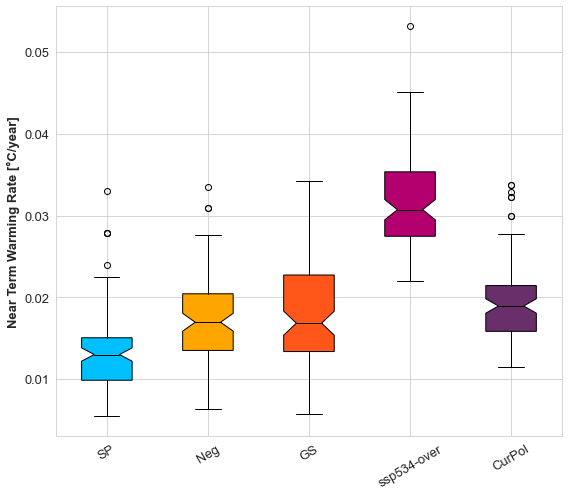

In [28]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (8,7))
    bplot1 = ax.boxplot(ntwr, labels = scenarios, patch_artist = True, notch=True)
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bplot1[element], color='black')

    ax.set_xticklabels(scenarios, rotation=30, fontsize=13)
    ax.set_yticks([0.01, 0.02, 0.03, 0.04, 0.05])
    ax.set_yticklabels([0.01, 0.02, 0.03, 0.04, 0.05],fontsize=13)
    ax.set_ylabel('Near Term Warming Rate [°C/year]', fontsize = 13, fontweight = 'bold')
    plt.tight_layout()
    plt.show()

combined figure

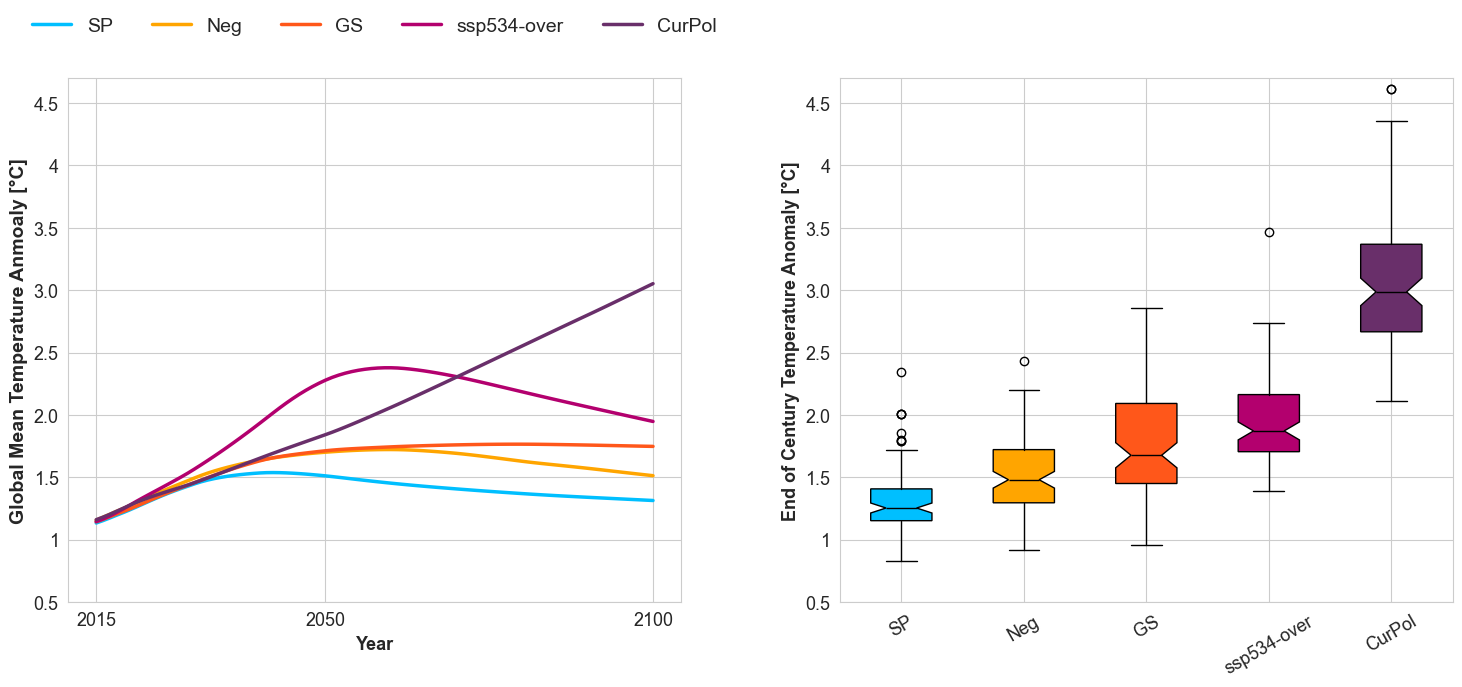

In [11]:
# maximum and eoc temperatures
ntwr    = []
tas_eoc = []
tas_max = []

for i_scen in range(len(scenarios)):
    scenario         = scenarios[i_scen]
    ntwr.append(list_gmt_ds[i_scen].rolling(window = 25, axis = 0, center = True).mean().loc[slice(2020,2040), :].diff().mean().values)
    tas_eoc.append(list_gmt_ds[i_scen].loc[2100, :].values)
    tas_max.append(list_gmt_ds[i_scen].loc[slice(2015,2100), :].max(axis = 0))

# plot gmt trajectories
cmap   = sns.color_palette("flare", as_cmap=True)
colors = cmap(np.linspace(0,1,len(scenarios)))
colors = ['#00BFFF', '#FFA500', '#ff571a', '#b3006e', '#692F6A']
# colors = ['#00BFFF', '#001f99', '#FFA500', '#ff571a', '#e60000', '#b3006e', '#692F6A']
# colors = ['#00BFFF', '#001f99', '#FFA500', '#ff571a', '#e60000', '#cb015c', '#692F6A']

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (15,7), ncols = 2, nrows = 1)
    for i_scen in range(len(scenarios)):
        scenario = scenarios[i_scen]
        gmt_trajectories = list_gmt_ds[i_scen].loc[slice(2015,2100), :].mean(axis = 1)
        ax[0].plot(gmt_trajectories.index, gmt_trajectories.values, color = colors[i_scen], linewidth = 2.5, label = scenario)
    ax[0].set_xticks([2015, 2050, 2100])
    ax[0].set_xticklabels([2015, 2050, 2100], fontsize = 13)
    ax[0].set_yticks([0.5, 1, 1.5,2.0,2.5,3.0, 3.5, 4, 4.5])
    ax[0].set_yticklabels([0.5, 1, 1.5,2.0,2.5,3.0, 3.5, 4, 4.5], fontsize = 13)
    ax[0].set_ylim(0.5,4.7)
    ax[0].set_xlabel('Year', fontsize = 13, fontweight = 'bold')
    ax[0].set_ylabel('Global Mean Temperature Anmoaly [°C]', fontsize = 14, fontweight = 'bold')
    ax[0].legend(ncol = 5, fontsize = 14, loc = 'upper center', frameon = False, bbox_to_anchor=(0.5, 1.15))
    
    bplot1 = ax[1].boxplot(tas_eoc, labels = scenarios, patch_artist = True, notch=True)
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bplot1[element], color='black')

    ax[1].set_xticklabels(scenarios, rotation=30, fontsize=13)
    ax[1].set_yticks([0.5, 1, 1.5,2.0,2.5,3.0, 3.5, 4, 4.5])
    ax[1].set_yticklabels([0.5, 1, 1.5,2.0,2.5,3.0, 3.5, 4, 4.5], fontsize = 13)
    ax[1].set_ylim(0.5,4.7)
    # ax[1].set_yticks([1.0,1.5,2,2.5,3,3.5,4,4.5])
    # ax[1].set_yticklabels([1.0,1.5,2,2.5,3,3.5,4,4.5],fontsize=13)
    ax[1].set_ylabel('End of Century Temperature Anomaly [°C]', fontsize = 13, fontweight = 'bold')
    plt.tight_layout()
    plt.show()

# Stylised GDP trajectories

In [7]:
years = np.arange(2015,2101,1)

In [8]:
y_growth_accelerating     = 0.13*np.exp(0.04*(years-2015))-1.63
y_growth_constant         = 0.041*(years-2015)-1.5
y_growth_slowing          = 1.4*np.log(0.1*(years-2014)+0.9)-1.5
y_growth_complex          = 2.23827367*10**(-12)*years**5  - 6.40624342*10**(-9)*years**4 - 7.56066177*10**(-6)*years**3 +  1.53649475*10**(-2)*years**2 + 5.54010968*10**1*years - 8.09050281*10**4
y_stagnation_normal       = -0.000533*(years-2015)**2+0.069*(years-2015)-1.5
y_stagnation_normal[63:]  = 0.73
y_stagnation_complex      = 3.032952801004872e-08*years**5-0.0003133029502560941*years**4+1.2944615357045461*years**3-2673.926959661213*years**2+2761503.1360722124*years-1140688424.188846-0.78
y_nogrowth_normal           = -0.00066115702*(years-2015)**2+0.07272727272*(years-2015)-1.5
y_nogrowth_complex          = 7.697877562439336e-08*years**5 + -0.000793981717365918*years**4 + 3.275521122253075*years**3 + -6756.016333993602*years**2 + 6966928.2130272165*years**1 + -2873573436.7270246-1.5

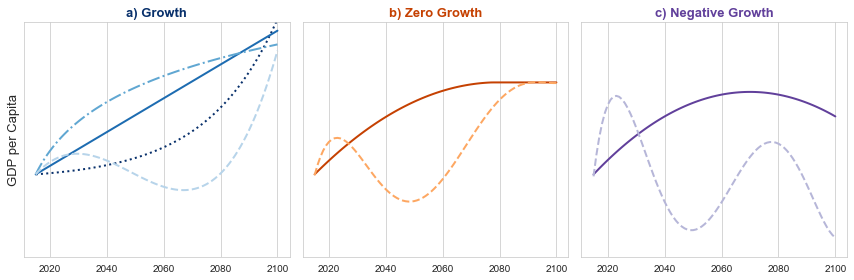

In [9]:
# colors adapted from tab10 = sns.color_palette("tab10")
growth_colors       = sns.color_palette("Blues_r", as_cmap=True)(np.linspace(0, 0.7, 4))
# ['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4']
stagnation_colors   = sns.color_palette("Oranges_r", as_cmap=True)(np.linspace(0.2, 0.6, 2))
# ['#9467bd', '#9467bd']
nogrowth_colors     = sns.color_palette("Purples_r", as_cmap=True)(np.linspace(0.2, 0.6, 2))
# ['#ff7f0e', '#ff7f0e']

default_linewidth = 2

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (12,4), ncols = 3, nrows = 1)
    # - growth 
    #    - exp growth
    ax[0].plot(years, y_growth_accelerating, color = growth_colors[0], linestyle = 'dotted', linewidth  = default_linewidth)
    #    - const growth
    ax[0].plot(years, y_growth_constant, color = growth_colors[1], linestyle = '-', linewidth  = default_linewidth)
    #    - slowing growth
    ax[0].plot(years, y_growth_slowing, color = growth_colors[2], linestyle = 'dashdot', linewidth  = default_linewidth)
    #    - comlpex growth
    ax[0].plot(years, y_growth_complex, color = growth_colors[3], linestyle = '--', linewidth  = default_linewidth)
    
    # - stagnation
    #     - normal
    ax[1].plot(years, y_stagnation_normal, color = stagnation_colors[0], linestyle = '-', linewidth  = default_linewidth)
    #     - complex
    ax[1].plot(years, y_stagnation_complex, color = stagnation_colors[1], linestyle = '--', linewidth  = default_linewidth)

    # - growth
    #     - normal
    ax[2].plot(years, y_nogrowth_normal, color = nogrowth_colors[0], linestyle = '-', linewidth  = default_linewidth)
    #     - complex
    ax[2].plot(years, y_nogrowth_complex, color = nogrowth_colors[1], linestyle = '--', linewidth  = default_linewidth)

    # general settings    
    ax[0].set_ylim(bottom = -3.5, top = 2.2)
    ax[1].set_ylim(bottom = -3.5, top = 2.2)
    ax[2].set_ylim(bottom = -3.5, top = 2.2)
    
    ax[0].set_yticks([])
    ax[1].set_yticks([])
    ax[2].set_yticks([])
    ax[0].set_title('a) Growth', fontsize = 13, fontweight = 'bold', color = growth_colors[0])
    ax[1].set_title('b) Zero Growth', fontsize = 13, fontweight = 'bold', color = stagnation_colors[0])
    ax[2].set_title('c) Negative Growth', fontsize = 13, fontweight = 'bold', color = nogrowth_colors[0])
    ax[0].set_ylabel('GDP per Capita', fontsize = 13)
    plt.tight_layout()
    plt.show()

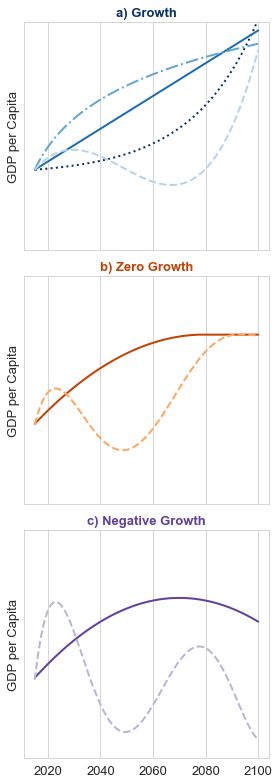

In [14]:
# colors adapted from tab10 = sns.color_palette("tab10")
growth_colors       = sns.color_palette("Blues_r", as_cmap=True)(np.linspace(0, 0.7, 4))
# ['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4']
stagnation_colors   = sns.color_palette("Oranges_r", as_cmap=True)(np.linspace(0.2, 0.6, 2))
# ['#9467bd', '#9467bd']
nogrowth_colors     = sns.color_palette("Purples_r", as_cmap=True)(np.linspace(0.2, 0.6, 2))
# ['#ff7f0e', '#ff7f0e']

default_linewidth = 2

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (4, 11), ncols = 1, nrows = 3)
    # - growth 
    #    - exp growth
    ax[0].plot(years, y_growth_accelerating, color = growth_colors[0], linestyle = 'dotted', linewidth  = default_linewidth)
    #    - const growth
    ax[0].plot(years, y_growth_constant, color = growth_colors[1], linestyle = '-', linewidth  = default_linewidth)
    #    - slowing growth
    ax[0].plot(years, y_growth_slowing, color = growth_colors[2], linestyle = 'dashdot', linewidth  = default_linewidth)
    #    - comlpex growth
    ax[0].plot(years, y_growth_complex, color = growth_colors[3], linestyle = '--', linewidth  = default_linewidth)
    
    # - stagnation
    #     - normal
    ax[1].plot(years, y_stagnation_normal, color = stagnation_colors[0], linestyle = '-', linewidth  = default_linewidth)
    #     - complex
    ax[1].plot(years, y_stagnation_complex, color = stagnation_colors[1], linestyle = '--', linewidth  = default_linewidth)

    # - growth
    #     - normal
    ax[2].plot(years, y_nogrowth_normal, color = nogrowth_colors[0], linestyle = '-', linewidth  = default_linewidth)
    #     - complex
    ax[2].plot(years, y_nogrowth_complex, color = nogrowth_colors[1], linestyle = '--', linewidth  = default_linewidth)

    # general settings    
    ax[0].set_ylim(bottom = -3.5, top = 2.2)
    ax[1].set_ylim(bottom = -3.5, top = 2.2)
    ax[2].set_ylim(bottom = -3.5, top = 2.2)
    
    ax[0].set_yticks([])
    ax[1].set_yticks([])
    ax[2].set_yticks([])
    ax[0].set_xticks([2020,2040,2060,2080,2100])
    ax[1].set_xticks([2020,2040,2060,2080,2100])
    ax[2].set_xticks([2020,2040,2060,2080,2100])
    ax[0].set_xticklabels([])
    ax[1].set_xticklabels([])
    ax[2].set_xticklabels([2020,2040,2060,2080,2100], fontsize = 13)    
    ax[0].set_title('a) Growth', fontsize = 13, fontweight = 'bold', color = growth_colors[0])
    ax[1].set_title('b) Zero Growth', fontsize = 13, fontweight = 'bold', color = stagnation_colors[0])
    ax[2].set_title('c) Negative Growth', fontsize = 13, fontweight = 'bold', color = nogrowth_colors[0])
    ax[0].set_ylabel('GDP per Capita', fontsize = 13)
    ax[1].set_ylabel('GDP per Capita', fontsize = 13)
    ax[2].set_ylabel('GDP per Capita', fontsize = 13)
    plt.tight_layout()
    plt.show()

In [2]:
import sys
from pathlib import Path
sys.path.append('/Users/schoens/Documents/Projekte/Econ/Code/v3/')

import xarray as xr
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import config.settings as cset

In [16]:
pd.read_csv(cset.path_FAIR / f'ids_reconstructed.csv', sep = ',').dropna(axis = 1)

,Unnamed: 0,ssp119,SP,Neg,LD,Ren,GS,ssp534-over,ModAct,CurPol,Ref_1p5
0,0,229,128,1242,1356,1540,644,1068,960,144,1204
1,1,844,1419,622,1521,1833,1517,1487,1634,1562,2076
2,2,2067,960,1889,728,854,1607,1017,1996,1303,35
3,3,1684,75,1605,811,650,1720,2099,129,1967,604
4,4,1915,810,1896,336,1219,1739,2070,134,2024,2095
...,...,...,...,...,...,...,...,...,...,...,...
95,95,2121,2222,2172,1644,558,1921,1269,1967,2040,2141
96,96,1760,512,339,1169,1166,1677,2089,332,1895,1715
97,97,2050,544,246,1987,407,206,534,104,883,53
98,98,1861,2095,2007,788,1700,1633,1841,453,298,1504


In [17]:
scenarios = cset.scenarios

list_gmt_ds = []
for i_scen in range(len(scenarios)):
    scenario = scenarios[i_scen]
    fair_ids_100  = pd.read_csv(cset.path_FAIR / f'ids_reconstructed.csv', sep = ',', index_col = 0).dropna(axis = 1).rename(columns = {'Ref_1p5': 'Ref'})
    all_fair_runs = pd.read_csv(cset.path_FAIR  / f'scen_{scenario}.csv', index_col = 0).iloc[:, fair_ids_100.loc[:, scenario].values]
    all_fair_runs.columns = np.arange(100)
    import xarray as xr
    mesmer_ids = xr.load_dataset(cset.path_MESMER_fldmean / f'{scenario}_fldmean.nc')['fair_esm_variability_realisation'].values
    fair_ids_mesmer = [int(f.split('_')[0]) for f in mesmer_ids]
    gmt_trajectories = all_fair_runs.loc[:, fair_ids_mesmer]
    gmt_trajectories.columns = np.arange(100)
    list_gmt_ds.append(gmt_trajectories)

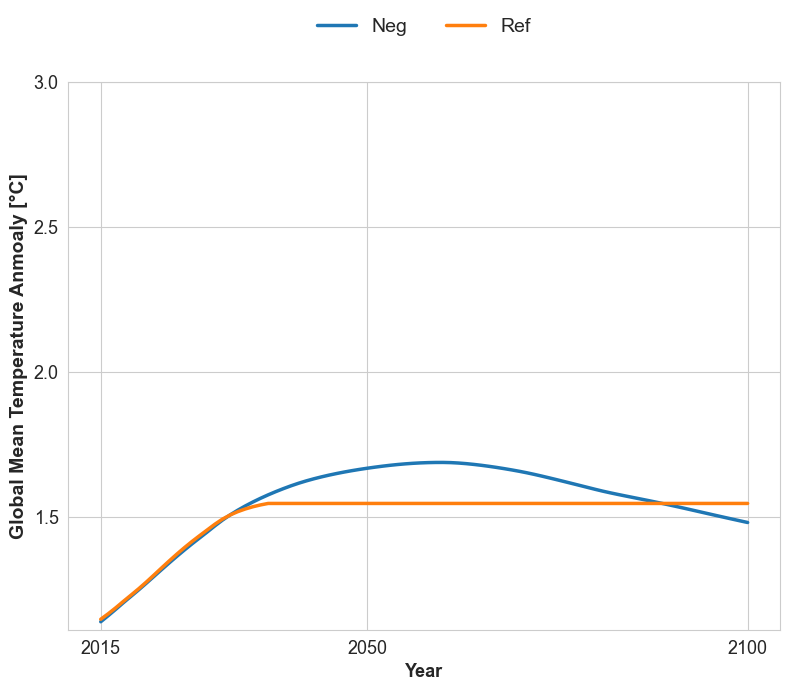

In [18]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (8,7))
    # i_scen = 4
    # q_05, q_95 = np.quantile(list_gmt_ds[i_scen].loc[slice(2015,2100), :].values, q = [0.05,0.95], axis = 1)
    # ax.fill_between(np.linspace(2015,2100,86), q_05, q_95, color = colors[i_scen], alpha = 0.2)
    for i_scen in [2, 5]:
        scenario = cset.scenarios[i_scen]
        gmt_trajectories = list_gmt_ds[i_scen].loc[slice(2015,2100), :].mean(axis = 1)
        ax.plot(gmt_trajectories.index, gmt_trajectories.values, linewidth = 2.5, label = scenario)
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = 13)
    ax.set_yticks([1.5,2.0,2.5,3.0])
    ax.set_yticklabels([1.5,2.0,2.5,3.0], fontsize = 13)
    ax.set_xlabel('Year', fontsize = 13, fontweight = 'bold')
    ax.set_ylabel('Global Mean Temperature Anmoaly [°C]', fontsize = 14, fontweight = 'bold')
    ax.legend(ncol = 3, fontsize = 14, loc = 'upper center', frameon = False, bbox_to_anchor=(0.5, 1.15))
    # legend = ax.legend(ncol = 3, fontsize = 14, loc = 'upper left', frameon = True, edgecolor = 'white')
    # legend.get_frame().set_facecolor('white')
    plt.tight_layout()
    plt.show()

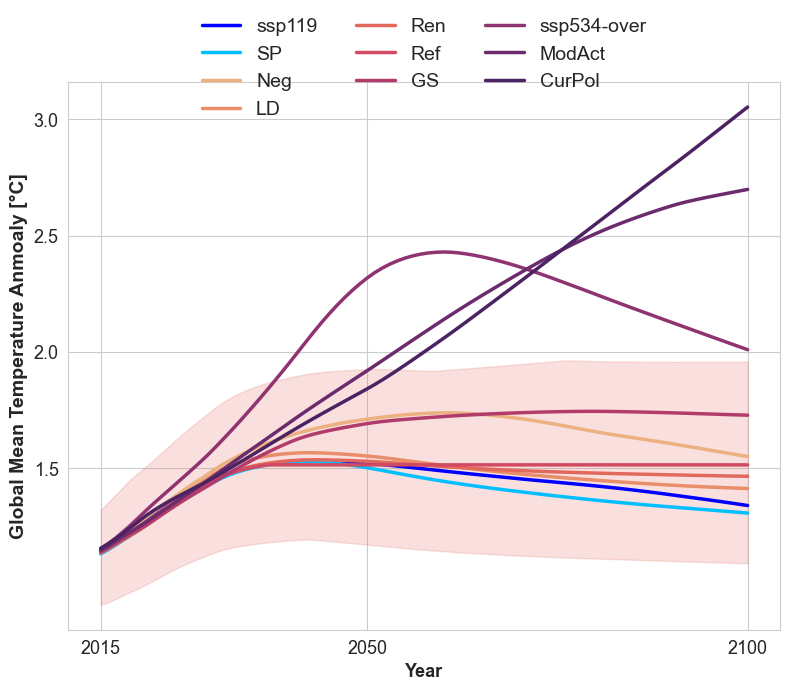

In [4]:
# plot gmt trajectories
cmap   = sns.color_palette("flare", as_cmap=True)
colors = cmap(np.linspace(0,1,len(scenarios)))
colors = ['blue', '#00BFFF'] + list(cmap(np.linspace(0,1,len(scenarios)-2)))
# colors = ['#00BFFF', '#FFA500', '#ff571a', '#b3006e', '#692F6A']
# colors = ['#00BFFF', '#FFA500', '#ff571a', '#b3006e', '#692F6A']
# colors = ['#00BFFF', '#001f99', '#FFA500', '#ff571a', '#e60000', '#b3006e', '#692F6A']
# colors = ['#00BFFF', '#001f99', '#FFA500', '#ff571a', '#e60000', '#cb015c', '#692F6A']

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize = (8,7))
    i_scen = 4
    q_05, q_95 = np.quantile(list_gmt_ds[i_scen].loc[slice(2015,2100), :].values, q = [0.05,0.95], axis = 1)
    ax.fill_between(np.linspace(2015,2100,86), q_05, q_95, color = colors[i_scen], alpha = 0.2)
    for i_scen in range(len(scenarios)):
        scenario = scenarios[i_scen]
        gmt_trajectories = list_gmt_ds[i_scen].loc[slice(2015,2100), :].mean(axis = 1)
        ax.plot(gmt_trajectories.index, gmt_trajectories.values, color = colors[i_scen], linewidth = 2.5, label = scenario)
    ax.set_xticks([2015, 2050, 2100])
    ax.set_xticklabels([2015, 2050, 2100], fontsize = 13)
    ax.set_yticks([1.5,2.0,2.5,3.0])
    ax.set_yticklabels([1.5,2.0,2.5,3.0], fontsize = 13)
    ax.set_xlabel('Year', fontsize = 13, fontweight = 'bold')
    ax.set_ylabel('Global Mean Temperature Anmoaly [°C]', fontsize = 14, fontweight = 'bold')
    ax.legend(ncol = 3, fontsize = 14, loc = 'upper center', frameon = False, bbox_to_anchor=(0.5, 1.15))
    # legend = ax.legend(ncol = 3, fontsize = 14, loc = 'upper left', frameon = True, edgecolor = 'white')
    # legend.get_frame().set_facecolor('white')
    plt.tight_layout()
    plt.show()